<a href="https://colab.research.google.com/github/s24966904/note/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92/RegressionTreeDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [66]:
'''
Age(年齡)
性別(Sex)
Body mass index(體質指數)
Average Blood Pressure(平均血壓)
S1~S6一年後疾病級數指標
Target為一年後患疾病的定量指標
'''

'\nAge(年齡)\n性別(Sex)\nBody mass index(體質指數)\nAverage Blood Pressure(平均血壓)\nS1~S6一年後疾病級數指標\nTarget為一年後患疾病的定量指標\n'

In [67]:
import pandas as pd
df=pd.DataFrame(diabetes["data"],columns=diabetes['feature_names'])
df['target']=pd.DataFrame(diabetes["target"],columns=["target"])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


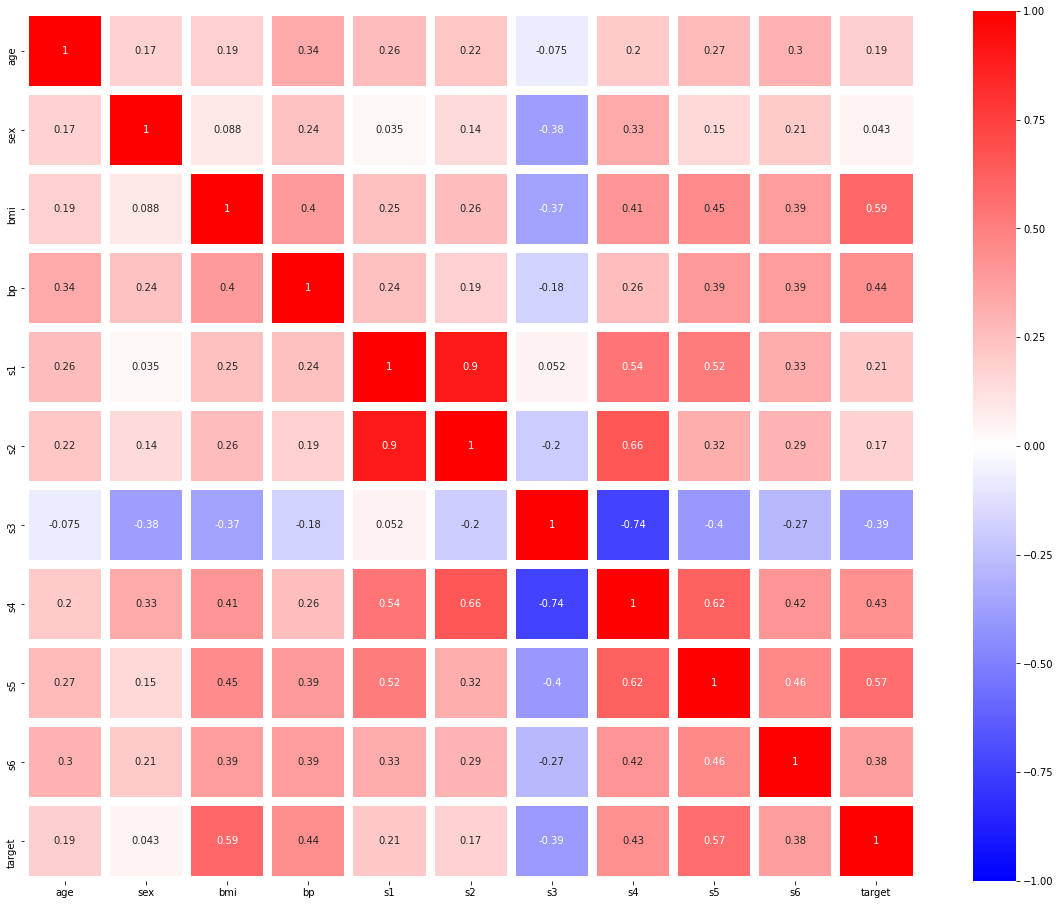

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(df.astype(float).corr(),vmin=-1, vmax=1,center=0,annot=True,linewidths=8,cmap="bwr")

In [86]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(["target"],axis=1),df["target"],train_size=0.1)

In [103]:
from sklearn.tree import DecisionTreeRegressor
reg =DecisionTreeRegressor(max_depth=5)
reg.fit(x_train,y_train)
#mse 均方誤差 Mean-Square Error

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

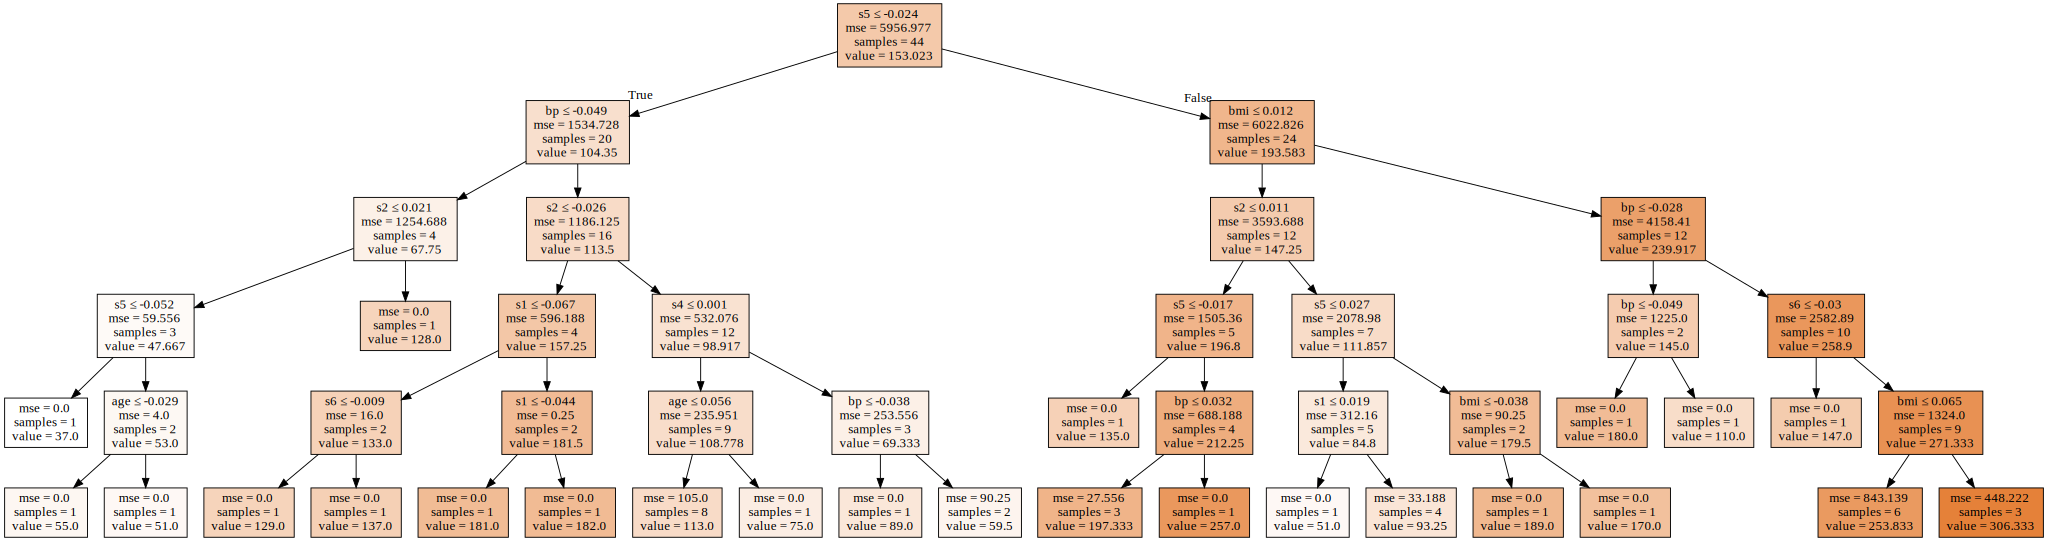

In [104]:
import graphviz
from sklearn.tree import export_graphviz
g=export_graphviz(reg,out_file=None,feature_names=diabetes['feature_names'],filled=True,special_characters=True)
graph=graphviz.Source(g)
graph

In [105]:
pre =reg.predict(x_test)
print('預測標籤',list(pre))
print('真正標籤',list(y_test))
from sklearn.metrics import r2_score
print("r2",r2_score(y_test,pre))

預測標籤 [93.25, 55.0, 110.0, 110.0, 197.33333333333334, 113.0, 253.83333333333334, 75.0, 257.0, 253.83333333333334, 197.33333333333334, 93.25, 197.33333333333334, 113.0, 181.0, 197.33333333333334, 306.3333333333333, 93.25, 135.0, 197.33333333333334, 306.3333333333333, 253.83333333333334, 170.0, 181.0, 253.83333333333334, 113.0, 197.33333333333334, 253.83333333333334, 129.0, 128.0, 93.25, 137.0, 197.33333333333334, 135.0, 113.0, 253.83333333333334, 113.0, 197.33333333333334, 306.3333333333333, 197.33333333333334, 113.0, 197.33333333333334, 306.3333333333333, 197.33333333333334, 253.83333333333334, 137.0, 93.25, 128.0, 113.0, 181.0, 306.3333333333333, 129.0, 113.0, 253.83333333333334, 110.0, 135.0, 253.83333333333334, 51.0, 93.25, 197.33333333333334, 253.83333333333334, 306.3333333333333, 253.83333333333334, 180.0, 93.25, 93.25, 257.0, 182.0, 113.0, 135.0, 253.83333333333334, 51.0, 253.83333333333334, 197.33333333333334, 182.0, 197.33333333333334, 113.0, 113.0, 257.0, 253.83333333333334, 25